# Interactive Spectra combination!

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import simulators
from mingle.utilities.phoenix_utils import load_starfish_spectrum
from simulators.iam_module import prepare_iam_model_spectra


/home/jneal/Phd/Codes/companion_simulations/simulators/__init__.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykern

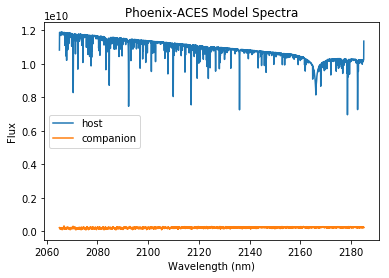

Agerage flux ratio 0.020965876730824468


In [7]:
def load(teff, logg, feh, xmin=21500, xmax=22000):
    # Replace with path to model files
    name = os.path.join("PHOENIX", "Z{0:+1.10}".format(float(feh)),
        "lte{0:05d}-{1:1.02f}{2:+1.10}.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits".format(teff, float(logg), float(feh)))
    
    if feh == 0:
        name = name.replace("Z+0.0", "Z-0.0")
        name = name.replace("+0.0.PHOENIX", "-0.0.PHOENIX")
    flux = fits.getdata(name)
    wav = fits.getdata(os.path.join("PHOENIX", "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))
    mask = (wav < xmax) * (wav > xmin)

    return wav[mask], flux[mask]

    
@interact(teff_1=widgets.IntSlider(min=2300, max=8000, step=100, value=5600),
          logg_1=widgets.FloatSlider(min=3, max=5.5, step=0.5, value=4.5),
          feh_1=widgets.FloatSlider(min=-2, max=1, step=0.5, value=0),
          teff_2=widgets.IntSlider(min=2300, max=7000, step=100, value=2300),
          logg_2=widgets.FloatSlider(min=3, max=5.5, step=0.5, value=4.5),
          feh_2=widgets.FloatSlider(min=-2, max=1, step=0.5, value=0),
          xmin=widgets.FloatSlider(min=900, max=4900, step=500, value=2200),
          window=widgets.FloatSlider(min=10, max=100, step=10, value=50),
          combined=widgets.Checkbox(False),
          SNR=widgets.FloatSlider(min=1, max=100, step=1, value=50),
          rv=widgets.FloatSlider(min=-20, max=20, step=1, value=-5),
          gamma=widgets.FloatSlider(min=-21, max=20, step=1, value=10))
def plt_spectrum(teff_1, logg_1, feh_1, teff_2, logg_2, feh_2, xmin=2100, window=100, combined=False, noise=100, rv=0, gamma=0):
    host, comp = prepare_iam_model_spectra([teff_1, logg_1, feh_1], [teff_2, logg_2, feh_2], limits=[1000, 3000])
    #wav, flux = load(teff, logg, feh, xmin, xmin+window)
    
    host.plot( label="host")
    comp.plot(label="companion")
    plt.ylabel("Flux")
    plt.xlabel("Wavelength (nm)")
    plt.title("Phoenix-ACES Model Spectra")
    plt.legend()
    plt.show()
    
    print("Agerage flux ratio {}".format(np.median(comp.flux/host.flux)))
                       
                       

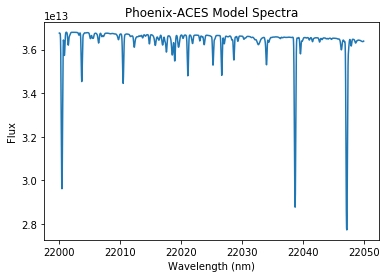

In [4]:
def load(teff, logg, feh, xmin=21500, xmax=22000):
    # Replace with path to model files
    name = os.path.join("/home/jneal/Phd/data/PHOENIX-ALL", "PHOENIX", "Z{0:+1.10}".format(float(feh)),
        "lte{0:05d}-{1:1.02f}{2:+1.10}.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits".format(teff, float(logg), float(feh)))
    
    if feh == 0:
        name = name.replace("Z+0.0", "Z-0.0")
        name = name.replace("+0.0.PHOENIX", "-0.0.PHOENIX")
    flux = fits.getdata(name)
    wav = fits.getdata(os.path.join("/home/jneal/Phd/data/PHOENIX-ALL","PHOENIX", "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))
    mask = (wav < xmax) * (wav > xmin)

    return wav[mask], flux[mask]

    
@interact(teff=widgets.IntSlider(min=2300, max=8000, step=100, value=5600),
          logg=widgets.FloatSlider(min=3, max=5.5, step=0.5, value=4.5),
          feh=widgets.FloatSlider(min=-2, max=1, step=0.5, value=0),
          xmin=widgets.FloatSlider(min=900, max=49000, step=500, value=22000),
          window=widgets.FloatSlider(min=10, max=1000, step=10, value=50),
          )
def plt_spectrum(teff, logg, feh, xmin=2100, window=100,):
    wav, flux = load(teff, logg, feh, xmin, xmin+window)
    
    plt.plot(wav, flux)
    plt.ylabel("Flux")
    plt.xlabel("Wavelength (nm)")
    plt.title("Phoenix-ACES Model Spectra")
    #plt.legend()
    plt.show()
                  
                       

In [5]:

widgets.IntSlider()



IntSlider(value=0)